### Gradient Descent in Machine Learning

---

## 1. What is Gradient Descent?

### 📌 Definition:
Gradient Descent is an optimization algorithm used to minimize the loss function by iteratively updating the model parameters in the opposite direction of the gradient.

### 🔽 Formula:
$$ \theta = \theta - \alpha \nabla J(\theta) $$

Where:
- $$ \theta : model parameters $$
- $$ \alpha : learning rate $$
- $$ \nabla J(\theta) : gradient of loss function $$


---

## 2. Intuition with Visualization

Let's visualize gradient descent on a simple quadratic function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

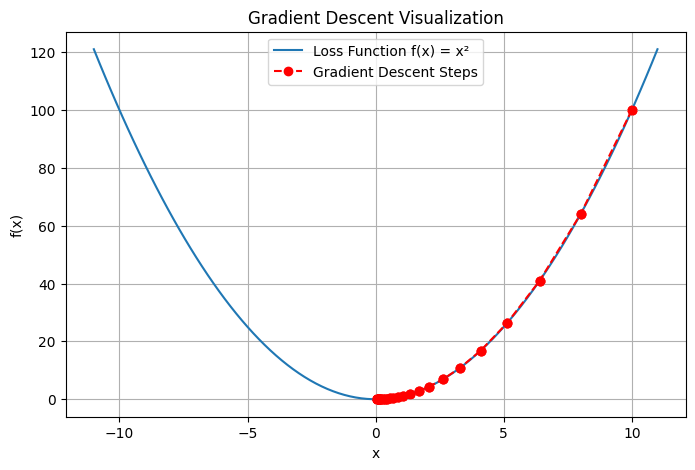

In [2]:
# Define the function and its gradient
def f(x):
    return x**2

def grad_f(x):
    return 2*x

# Gradient Descent function
def gradient_descent(grad, start, lr, n_iter):
    x_vals = [start]
    for _ in range(n_iter):
        x_new = x_vals[-1] - lr * grad(x_vals[-1])
        x_vals.append(x_new)
    return x_vals

# Run GD
x_start = 10
learning_rate = 0.1
iterations = 25
x_gd = gradient_descent(grad_f, x_start, learning_rate, iterations)

# Plot
x = np.linspace(-11, 11, 100)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Loss Function f(x) = x²')
plt.scatter(x_gd, [f(i) for i in x_gd], color='red', s=40)
plt.plot(x_gd, [f(i) for i in x_gd], '--o', color='red', label='Gradient Descent Steps')
plt.title("Gradient Descent Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

## 3. Types of Gradient Descent

- **Batch Gradient Descent**: Uses entire dataset to compute gradient
- **Stochastic Gradient Descent (SGD)**: Uses one random sample per step
- **Mini-batch Gradient Descent**: Uses subset (batch) of data

---

## 4. Learning Rate Effects
Visualize different learning rates:


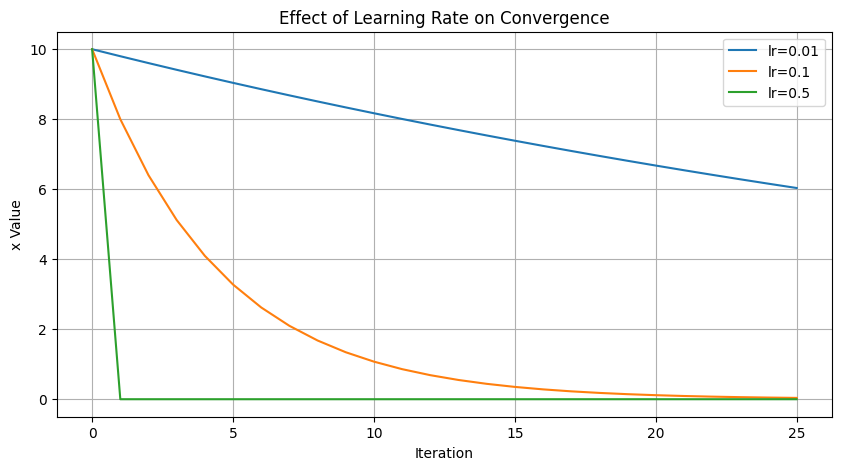

In [3]:
lrs = [0.01, 0.1, 0.5]

plt.figure(figsize=(10, 5))
for lr in lrs:
    x_gd = gradient_descent(grad_f, x_start, lr, iterations)
    plt.plot(x_gd, label=f"lr={lr}")

plt.title("Effect of Learning Rate on Convergence")
plt.xlabel("Iteration")
plt.ylabel("x Value")
plt.legend()
plt.grid(True)
plt.show()

## 5. Gradient Descent in ML: Linear Regression Example

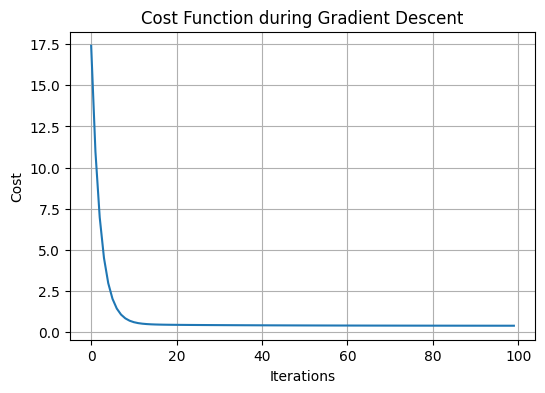

In [4]:
# Generate data
np.random.seed(1)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Cost function
def compute_cost(theta, x, y):
    m = len(y)
    predictions = x.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error ** 2)
    return cost

# Gradient function
def gradient(theta, x, y):
    m = len(y)
    return (1/m) * x.T.dot(x.dot(theta) - y)

# Gradient Descent for Linear Regression
def gradient_descent_lr(x, y, theta, alpha, iters):
    cost_history = []
    for _ in range(iters):
        theta -= alpha * gradient(theta, x, y)
        cost_history.append(compute_cost(theta, x, y))
    return theta, cost_history

# Add bias
X_b = np.c_[np.ones((100, 1)), x]
theta_init = np.random.randn(2, 1)
alpha = 0.1
iters = 100

theta_final, cost_hist = gradient_descent_lr(X_b, y, theta_init, alpha, iters)

# Plot cost vs iteration
plt.figure(figsize=(6, 4))
plt.plot(cost_hist)
plt.title("Cost Function during Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

## 6. Challenges & Tips

- **Choosing the right learning rate**
- **Local minima vs global minima**
- **Feature scaling helps with convergence**
- **Advanced variants**: Momentum, RMSprop, Adam, etc.